# Season 5 Episode 12 Competition Notebook

We are tasked with producing the probabilities of a person being diagnosed with diabetes. I have tried to structure this notebook as well as possible, and I sincerely hope you can benefit from this.

-----------------------------------------------------------------------------------------------

# Imports and loading datasets

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading datasets

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')
inference_df = pd.read_csv('/kaggle/input/playground-series-s5e12/test.csv')

-----------------------------------------------------------------------------------------------

# Null, duplicated, type, unique of columns

## Null check

In [3]:
train_df.isnull().values.any()

np.False_

## Duplication check

In [4]:
train_df.duplicated().values.any()

np.False_

## Type check

In [5]:
for cols in train_df.columns:
    print(f"{cols}: {train_df[cols].dtype}")

id: int64
age: int64
alcohol_consumption_per_week: int64
physical_activity_minutes_per_week: int64
diet_score: float64
sleep_hours_per_day: float64
screen_time_hours_per_day: float64
bmi: float64
waist_to_hip_ratio: float64
systolic_bp: int64
diastolic_bp: int64
heart_rate: int64
cholesterol_total: int64
hdl_cholesterol: int64
ldl_cholesterol: int64
triglycerides: int64
gender: object
ethnicity: object
education_level: object
income_level: object
smoking_status: object
employment_status: object
family_history_diabetes: int64
hypertension_history: int64
cardiovascular_history: int64
diagnosed_diabetes: float64


## Unique value count

In [6]:
train_df.nunique()

id                                    700000
age                                       71
alcohol_consumption_per_week               9
physical_activity_minutes_per_week       565
diet_score                                99
sleep_hours_per_day                       69
screen_time_hours_per_day                151
bmi                                      231
waist_to_hip_ratio                        36
systolic_bp                               71
diastolic_bp                              54
heart_rate                                60
cholesterol_total                        154
hdl_cholesterol                           69
ldl_cholesterol                          151
triglycerides                            228
gender                                     3
ethnicity                                  5
education_level                            4
income_level                               5
smoking_status                             3
employment_status                          4
family_his

## Column type aggregation

In [7]:
num_col = [col for col in train_df.drop(['id', 'diagnosed_diabetes'], axis=1) if train_df[col].dtype in ['float64', 'int64']]
cat_col = [col for col in train_df.drop(['id', 'diagnosed_diabetes'], axis=1) if train_df[col].dtype == 'object']

## Table description

In [8]:
train_df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


-----------------------------------------------------------------------------------------------

# Correlation checks

## Pairplots

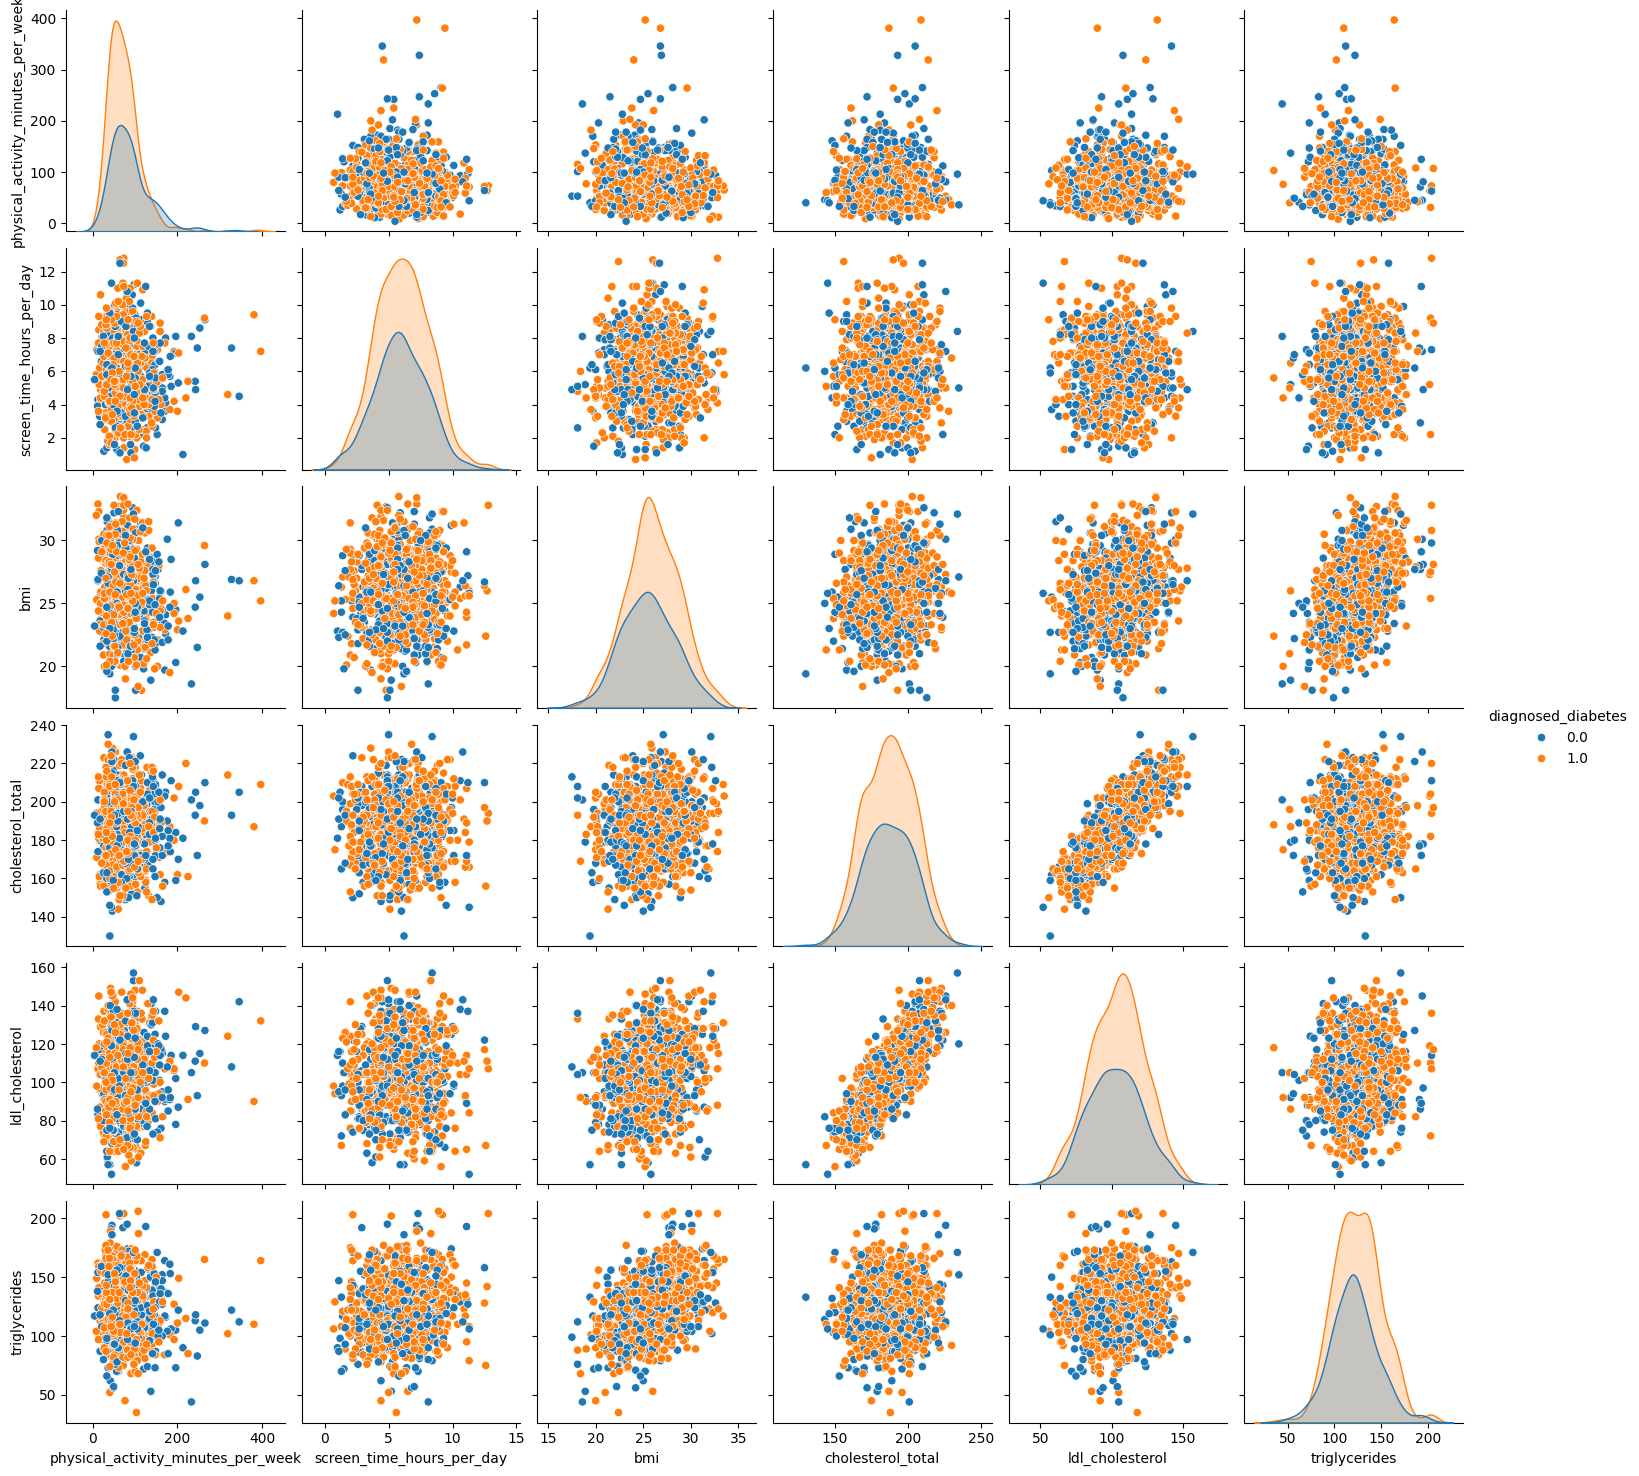

In [9]:
sns.pairplot(
    data=train_df.sample(1000, random_state=42),
    hue="diagnosed_diabetes",
    vars=[col for col in train_df.drop(['id'], axis=1) if len(train_df[col].unique()) > 100],
)
plt.show()

We can see some positive correlation between a few columns. Some of them can be removed.

## Correlation heatmap and dropping columns

Highly correlated columns add redundancy to models, so all except one are necessary for training. As far columns with almost no correlation is concerened, they can't contribute much either.

In [10]:
df_x = train_df.drop(['id', 'diagnosed_diabetes'], axis=1)
df_y = pd.DataFrame({'diagnosed_diabetes': train_df.diagnosed_diabetes})

inference_id = inference_df['id']
inference_df.drop(['id'], axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories="auto")
enc_ = pd.DataFrame(encoder.fit_transform(df_x[cat_col]), columns=cat_col)
df_x_ = pd.concat([df_x[num_col], enc_], axis=1)

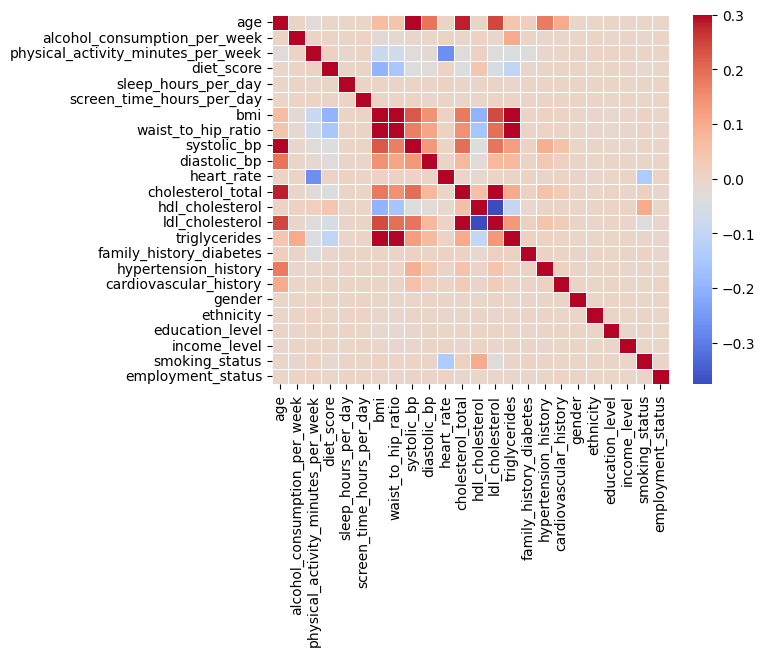

In [12]:
corr = df_x_.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, vmax=.3)
plt.show()

In [13]:
upper = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column]>0.8) or any(upper[column]<0.0002)]

In [14]:
df_x.drop(to_drop, axis=1, inplace=True)
inference_df.drop(to_drop, axis=1, inplace=True)

-----------------------------------------------------------------------------------------------

# Countplot

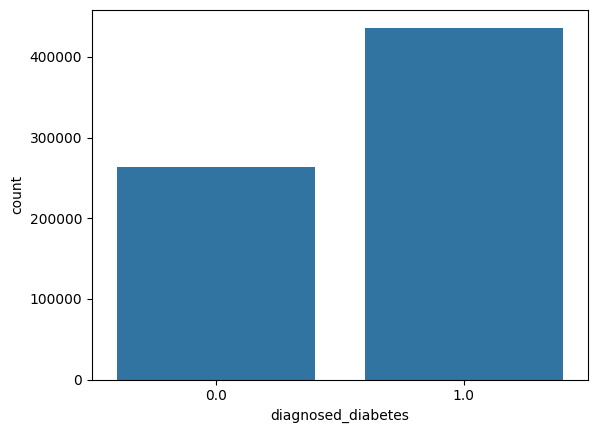

In [15]:
sns.countplot(data=df_y, x='diagnosed_diabetes')
plt.show()

Fairly balanced.

-----------------------------------------------------------------------------------------------

# Boxplots - finding outliers

In [16]:
df_x['hypertension_history'].value_counts()

hypertension_history
0    572607
1    127393
Name: count, dtype: int64

Some are binary features. Outlier detection won't make sense in this.

## Boxplots

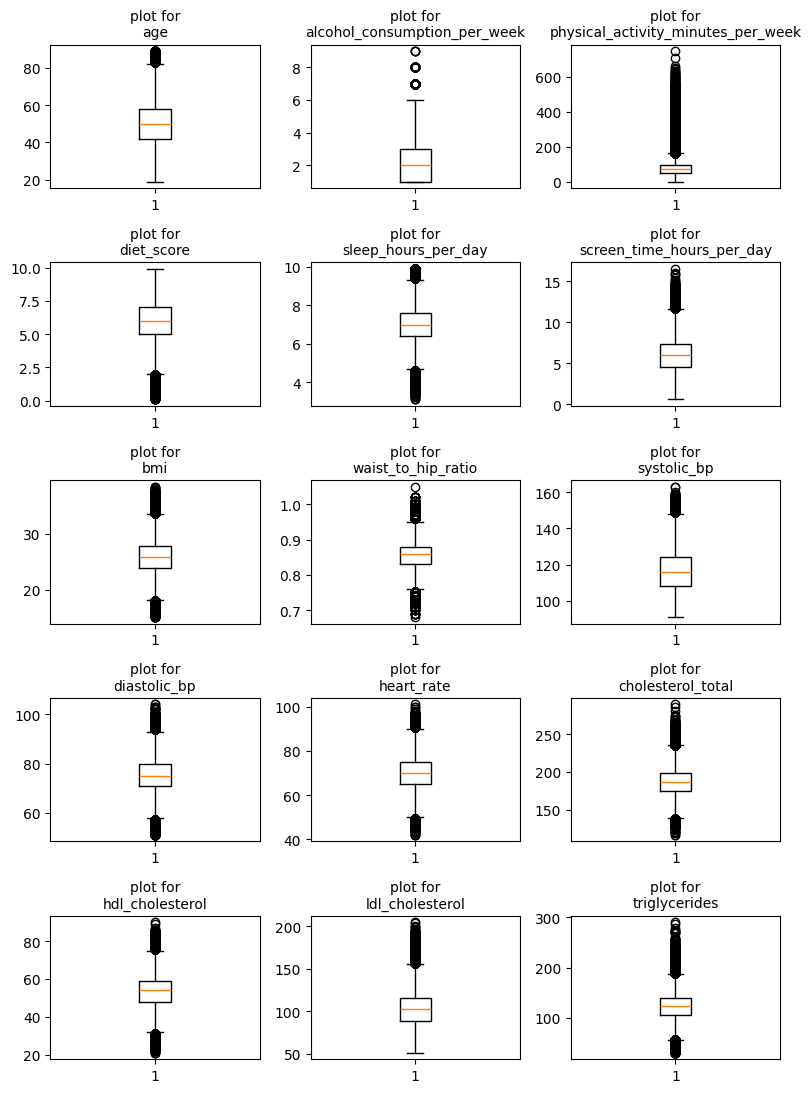

In [17]:
plt.figure(figsize=(4, 12))
i=1

for col in train_df.drop(['id', 'diagnosed_diabetes'], axis=1).columns:
    if train_df[col].dtype != 'object' and len(train_df[col].unique()) > 6:
        plt.subplot(5, 3, i)
        plt.boxplot(train_df[col])
        plt.title(f'plot for\n{col}', fontsize=10)
        i+=1
    else:
        continue
        
plt.tight_layout(rect=[0, 0.03, 2, 0.95])
plt.show()

## Outlier removal

In [18]:
i=1

for col in df_x.columns:
    if df_x[col].dtype != 'object' and len(df_x[col].unique()) > 5:
        q1 = np.quantile(df_x[col], 0.25)
        q3 = np.quantile(df_x[col], 0.75)
        iqr = q3 - q1
        
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        
        values = df_x[col].to_numpy()
        outliers = values[(values < lower_bound) | (values > upper_bound)]
        print("{}. for {} there were {} outliers.".format(i, col, len(outliers)))

        df_x[col] = df_x[col].astype('float')
        df_x.loc[df_x[col] < lower_bound, col] = lower_bound
        df_x.loc[df_x[col] > upper_bound, col] = upper_bound
        
        i+=1
    

1. for age there were 1013 outliers.
2. for alcohol_consumption_per_week there were 509 outliers.
3. for physical_activity_minutes_per_week there were 33490 outliers.
4. for diet_score there were 1997 outliers.
5. for sleep_hours_per_day there were 6152 outliers.
6. for screen_time_hours_per_day there were 2337 outliers.
7. for bmi there were 4254 outliers.
8. for waist_to_hip_ratio there were 6159 outliers.
9. for systolic_bp there were 775 outliers.
10. for diastolic_bp there were 5752 outliers.
11. for cholesterol_total there were 1771 outliers.
12. for hdl_cholesterol there were 4693 outliers.
13. for triglycerides there were 9053 outliers.


Outliers are removed. Re-run the above cell to check if there are any outliers present or not.

-----------------------------------------------------------------------------------------------

# Training, Testing and Inference

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

# another is StratifiedShuffleSplit, where the shuffling happens before each split, so there may be overlap of test sets
# in the following StratifiedKFold, there is shuffling just once before splitting, so no overlap of test sets

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [20]:
num_col = [col for col in df_x.columns if df_x[col].dtype != 'object']
cat_col = [col for col in df_x.columns if df_x[col].dtype == 'object']

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

model_xgb = xgb.XGBClassifier()

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),         # as there are no null values this wouldn't be needed but it's a good practice to include this
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),  # same here, good practice to include
    ('ord_enc', OrdinalEncoder(categories="auto")),
])

pre_processing = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_col),
    ('cat', cat_pipeline, cat_col),
])

model = Pipeline([
    ('preprocess', pre_processing),
    ('classifier', model_xgb),
])


X_train, X_test, y_train, y_test = train_test_split(df_x,
                                                    df_y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

param_grid = {
    'classifier__eta': [0.2, 0.25, 0.3, 0.35,],
    # 'classifier__gamma': [0, 0.5, 1],
    # 'classifier__max_depth': [5, 6, 7],
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=StratifiedKFold(5),
    scoring="roc_auc",
    n_jobs=-1,
)


grid.fit(X_train, y_train)

y_pred = grid.predict_proba(X_test)

roc_score = roc_auc_score(y_test, y_pred[:, 1])

print(f"\nROC score: {roc_score}")


ROC score: 0.7231795450959894


In [22]:
from sklearn.impute import SimpleImputer

preds = grid.predict_proba(
    inference_df
)

In [23]:
data = pd.DataFrame({
    'id': inference_id,
    'diagnosed_diabetes': preds[:, 1]
})

data.head()

,id,diagnosed_diabetes
0,700000,0.484646
1,700001,0.668555
2,700002,0.781264
3,700003,0.369371
4,700004,0.919953


In [24]:
data.to_csv(
    'submission.csv',
    index=False
)

I hope you learned something 💡 and enjoyed my notebook. Leave a upvote 👍, it will encourage me to share more code with the community.

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
